# Google Play Store Apps
sources:

https://www.kaggle.com/lava18/google-play-store-apps

https://www.pewresearch.org/internet/fact-sheet/mobile/

### Problem
Today mobile usage become a necessary tool in our daily life. According to Pewreseach, in the past ten years smartphone ownerships in the US has risen 45%, and currently, it has reached 81%. These devices gained popularity for their utilities, design styles, and third-party applications. With such popularity, many app developers gained massive profit from their applications. As an upcoming developer, getting into this business can be difficult. As such, the purpose of this research is to build a trained model that allow develper to predict the app's poplularity which can aid in their decision process.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
playstore = pd.read_csv('./data/googleplaystore.csv')

In [3]:
playstore.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
playstore.shape

(10841, 13)

### Check for null values

In [5]:
playstore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
playstore.dropna(inplace=True)

In [7]:
playstore.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [8]:
playstore.shape

(9360, 13)

### Data Exploration

Ask what kind of information needed in order to build an successful app?
What market should a developer?

In [9]:
cols=playstore.columns
cols

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
#Free and Paid App ratio
fp= playstore.groupby(['Type']).count()['App']
fp

Type
Free    8715
Paid     645
Name: App, dtype: int64

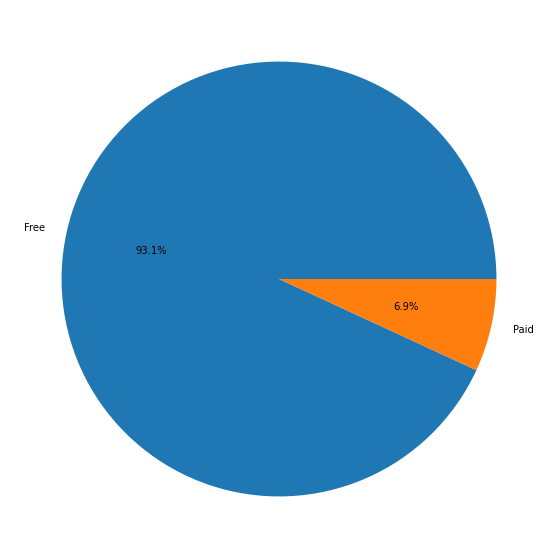

In [11]:
plt.subplots(figsize=(20,10))
plt.pie(fp.values, labels=fp.index, autopct='%1.1f%%')
plt.show()

In [12]:
#Looking at the app market
pc= playstore.groupby(['Category']).count()['App']

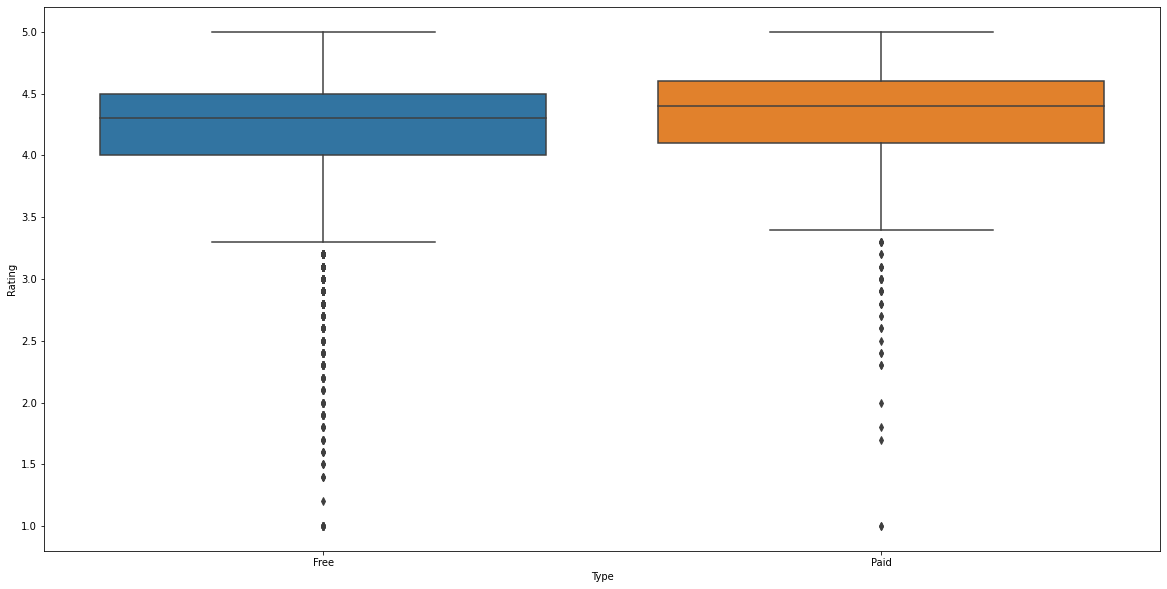

In [13]:
plt.subplots(figsize=(20,10))
ax = sns.boxplot(x="Type", y="Rating", data=playstore)

c:\users\prathna\desktop\play-store-machine-learning\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


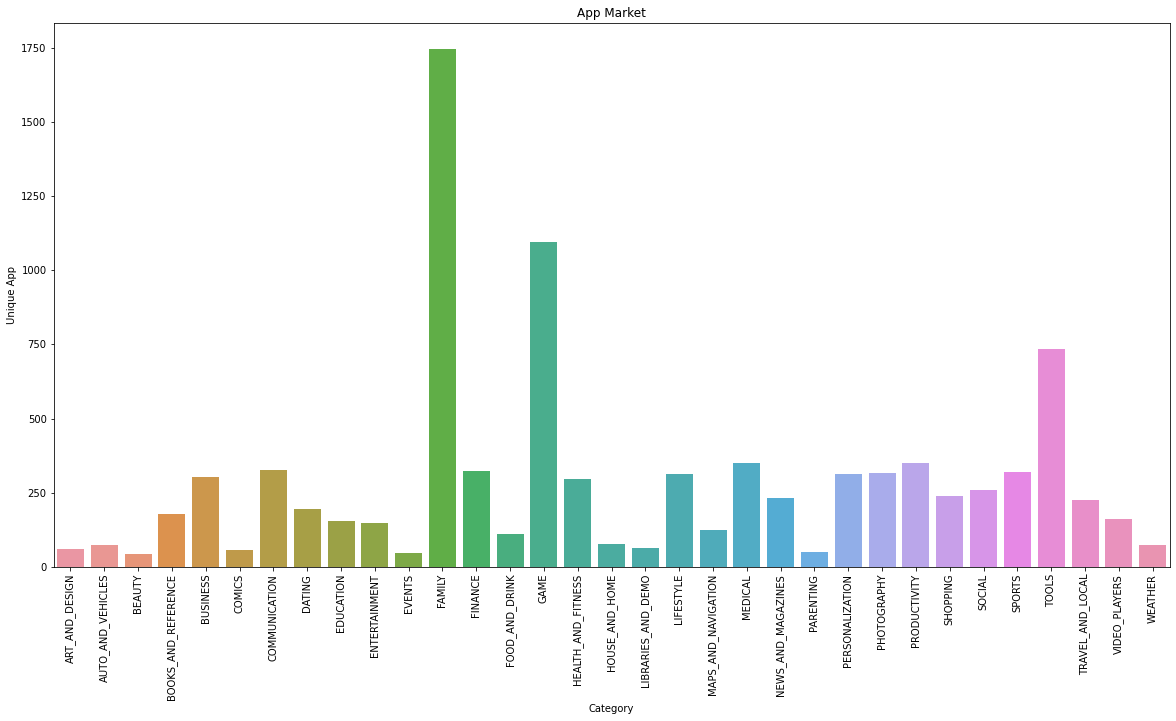

In [14]:
plt.subplots(figsize=(20,10))
ax = sns.barplot(pc.index,pc.values)
ax.set_xticklabels(labels=pc.index,rotation=90)
ax.set_ylabel('Unique App')
ax.set_title('App Market')
plt.show()

### Distruction of Unique App Average Rating in different Categories

If I were to make an app I would do it in the category where the left tail is long, because that mean there are lot of bad app, which would you to penetrate the market.

c:\users\prathna\desktop\play-store-machine-learning\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\prathna\desktop\play-store-machine-learning\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\prathna\desktop\play-store-machine-learning\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

c:\users\prathna\desktop\play-store-machine-learning\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\prathna\desktop\play-store-machine-learning\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\prathna\desktop\play-store-machine-learning\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

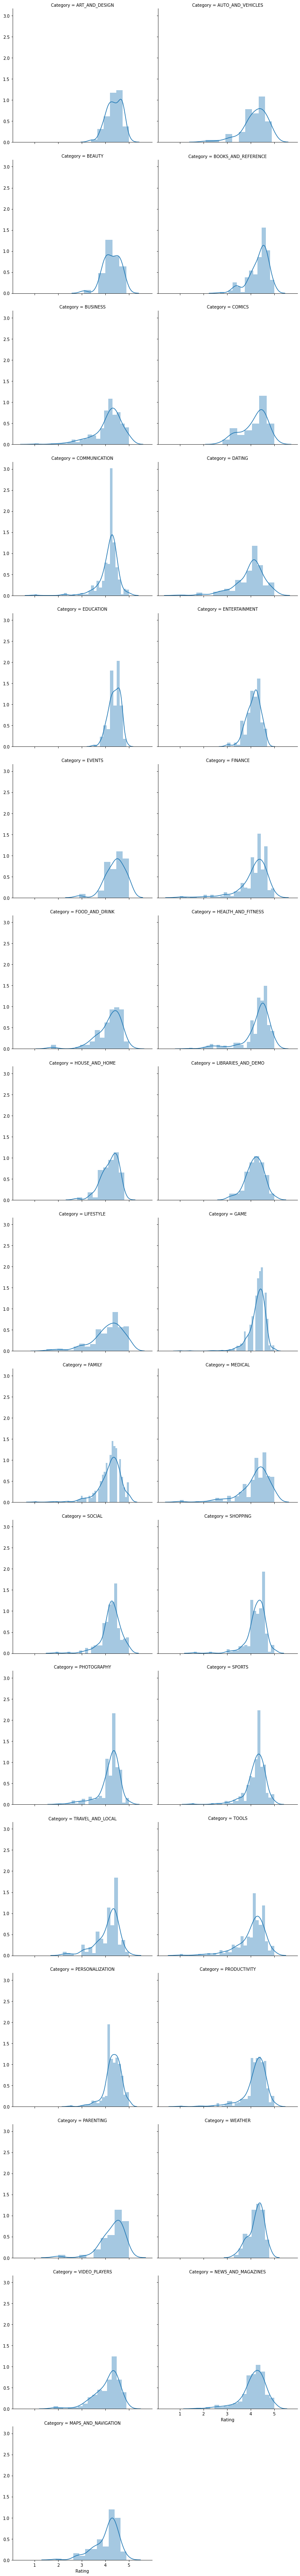

In [15]:
g = sns.FacetGrid(playstore, col="Category", col_wrap=2,height=5)
g.map(sns.distplot,'Rating')

In [16]:
pc.shape

(33,)

In [17]:
#Replace installs values to int
playstore.Installs = [x.replace(',','') for x in playstore.Installs]
playstore.Installs = [x.replace('+','') for x in playstore.Installs]
playstore.Installs = [int(x) for x in playstore.Installs]

In [18]:
playstore.sort_values(by=['Installs'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
451,Gmail,COMMUNICATION,4.3,4604483,Varies with device,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
386,Hangouts,COMMUNICATION,4.0,3419433,Varies with device,1000000000,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,Varies with device,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13M,1000000000,Free,0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
3765,Google News,NEWS_AND_MAGAZINES,3.9,877635,13M,1000000000,Free,0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
865,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,1000000000,Free,0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device


## Installs vs Category

suprisingly communication and game has the most downloads

c:\users\prathna\desktop\play-store-machine-learning\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


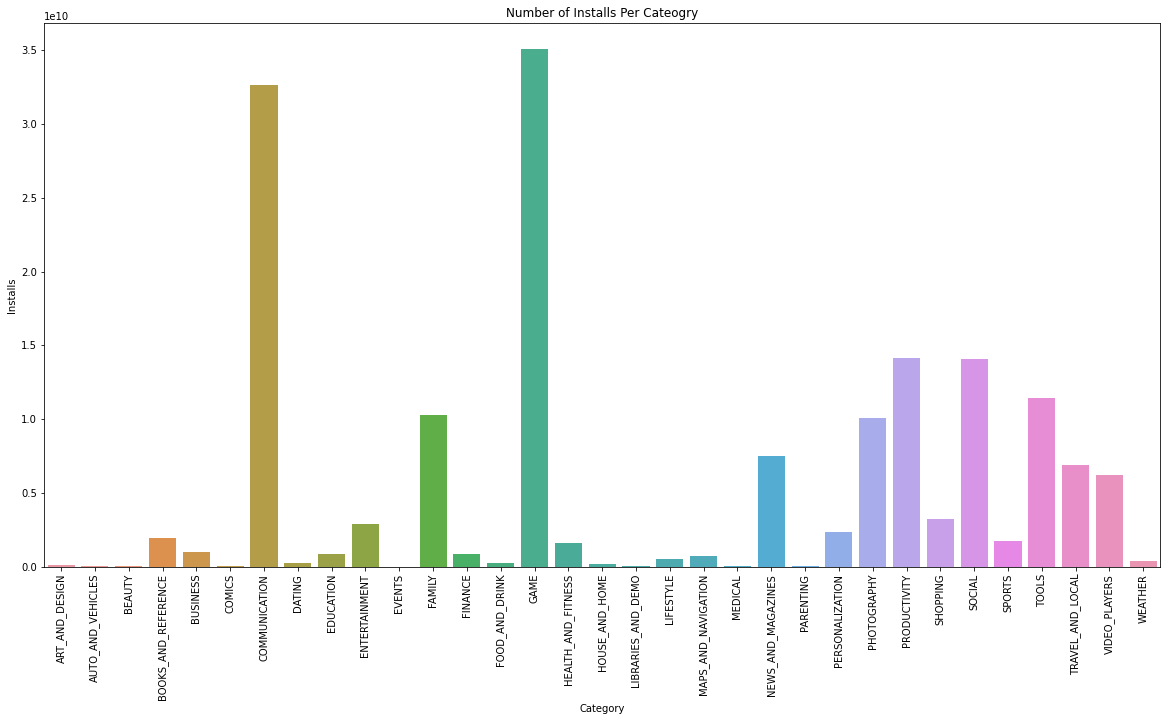

In [19]:
ins=[playstore.loc[playstore['Category'] == x]['Installs'].sum() for x in pc.index]
plt.subplots(figsize=(20,10))
ax = sns.barplot(pc.index,ins)
ax.set_xticklabels(labels=pc.index,rotation=90)
ax.set_ylabel('Installs')
ax.set_title('Number of Installs Per Cateogry')
plt.show()

### Distribution of file size

In [20]:
playstore.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [21]:
playstore.Size= [x.replace('Varies with device','0') for x in playstore.Size]
playstore.Size= [x.replace('M','000000') for x in playstore.Size]
playstore.Size = [x.replace('k','000') for x in playstore.Size]
playstore.Size = [float(x) for x in playstore.Size]
playstore.Size = [x*1000000 if x<10 else x for x in playstore.Size]
playstore.Size = [None if x==0 else x for x in playstore.Size]

In [22]:
playstore.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


c:\users\prathna\desktop\play-store-machine-learning\env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


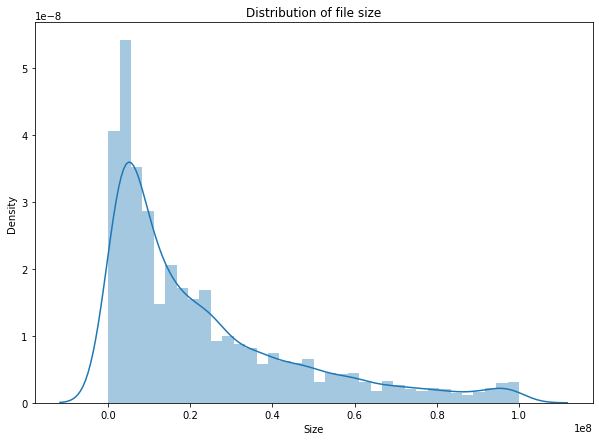

In [23]:
plt.subplots(figsize=(10,7))
ax=sns.distplot(playstore.Size)
ax.set_title('Distribution of file size')
plt.show()

### Content Rating Pie chart

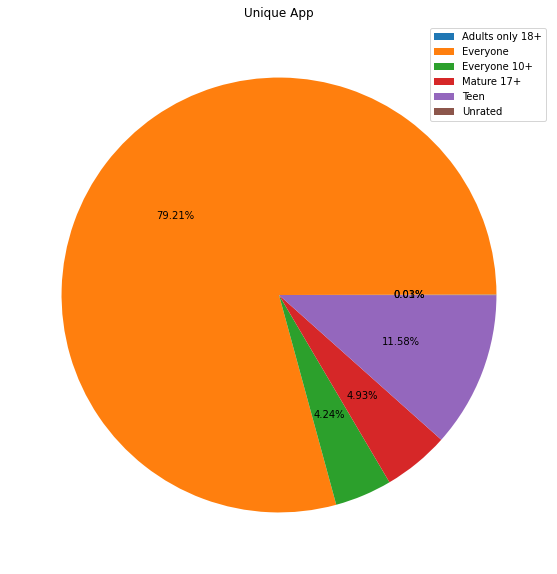

In [24]:
crp= playstore.groupby(['Content Rating']).count()['App']
plt.subplots(figsize=(20,10))
plt.pie(crp.values, autopct='%.2f%%')
plt.legend(crp.index)
plt.title('Unique App')
plt.show()

### Data Clean up
#### Onehotencoder example

In [25]:
#Onehotencoder
from sklearn.preprocessing import OneHotEncoder
def oneencoder(cat):
    onehotencoder = OneHotEncoder()
    caten = onehotencoder.fit_transform([[x] for x in playstore[cat]]).toarray()
    encodeddf=pd.DataFrame(caten,columns = onehotencoder.get_feature_names(input_features=[cat]))
    return encodeddf
Category_encoded = oneencoder('Category')
Category_encoded

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9358,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
